# Problem Statement: 
To analyse the battery charge-discharge testdataset and predict the maximum discharge capacity through a machine learning or deeplearning approach. 

# Approach:


Step 1: Import of the raw dataset

Step 2: Data Preprocessing . Data visualization and Looking out for outliers, data augmentation and cleaning. 

Step 3: Look out for the correlation among the input variables on the target variable.

Step 4: Dataset preparation for training and testing.

Step 5: Model building with NN or DNN 

Step 6: Performance evaluation




In [1]:
# import libraries for basic math operations, data import, cleaning and visualization

import numpy as np    
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# 1. Data Import and Preprocessing



In [2]:
# importing the raw dataset

raw_batt_data = pd.read_csv('Battery Challenge.csv')


In [3]:
# just to have a overview of the imported dataset

raw_batt_data.head()


Data_Point  Test_Time      DateTime  Step_Time  Step_Index  Cycle_Index  \
0           0    60.0002  1.523583e+09    60.0002           0            0   
1           1   120.0110  1.523583e+09   120.0110           0            0   
2           2   180.0036  1.523583e+09   180.0036           0            0   
3           3   240.0044  1.523583e+09   240.0044           0            0   
4           4   300.0033  1.523583e+09   300.0033           0            0   

   Current   Voltage  Charge_Capacity  Discharge_Capacity  Charge_Energy  \
0      0.0  3.298958              0.0                 0.0            0.0   
1      0.0  3.298994              0.0                 0.0            0.0   
2      0.0  3.299010              0.0                 0.0            0.0   
3      0.0  3.299028              0.0                 0.0            0.0   
4      0.0  3.299037              0.0                 0.0            0.0   

   Discharge_Energy     dV/dt  Internal_Resistance  Temperature  Aux_Voltage  
0               0.0  0.000031                  NaN          NaN          NaN  
1               0.0 -0.000011                  NaN    21.950123          NaN  
2               0.0  0.000024                  NaN    21.996164          NaN  
3               0.0 -0.000014                  NaN    22.138861          NaN  
4               0.0 -0.000011                  NaN    22.339970          NaN


The dataset desribes the charging and discharging patterns of a Li-ion battery for over 2000 Full Cycle Equivalants. All cycles are uniform and cycled from EoCV to EoDV i.e. 100% DoD. 

During the test the charge and discharge capacity and energy are logged besides the internal resistance and voltage gradient. 

Every phase of the test is indicated with step_index and cycle number is indicated in Cycle_index.


In [4]:
# Check for different datatypes, missing values etc in the imported dataset.

raw_batt_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564263 entries, 0 to 1564262
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Data_Point           1564263 non-null  int64  
 1   Test_Time            1564263 non-null  float64
 2   DateTime             1564263 non-null  float64
 3   Step_Time            1564263 non-null  float64
 4   Step_Index           1564263 non-null  int64  
 5   Cycle_Index          1564263 non-null  int64  
 6   Current              1564263 non-null  float64
 7   Voltage              1564263 non-null  float64
 8   Charge_Capacity      1564263 non-null  float64
 9   Discharge_Capacity   1564263 non-null  float64
 10  Charge_Energy        1564263 non-null  float64
 11  Discharge_Energy     1564263 non-null  float64
 12  dV/dt                1564263 non-null  float64
 13  Internal_Resistance  1562084 non-null  float64
 14  Temperature          1564262 non-null  float64
 15



The datatypes of all features are either Float or integer and no sign of categorical variables. So the conversion of datasets is not required with this dataset. 

It can also be seen that there are no recordings pertaining to Aux_voltage as well as some missing values in Internal_resistance.

In the next step, these nan values are cleaned from the raw dataset and are filled with appropriate mean or median values.


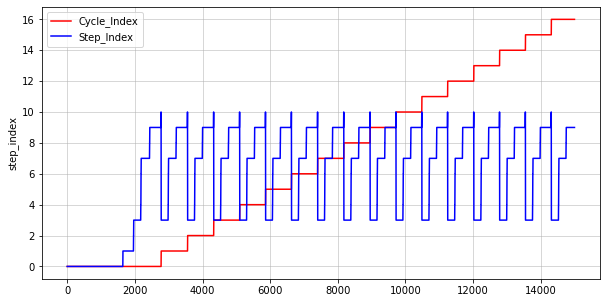

In [8]:
plt.rcParams['figure.figsize'] = (10,5);

plt.plot(raw_batt_data['Cycle_Index'][0:15000],'-r'); # partial dataset for better visualizations

plt.plot(raw_batt_data['Step_Index'][0:15000],'-b');

plt.grid(axis = 'both',linewidth = 0.5);

plt.ylabel('step_index');

plt.legend(['Cycle_Index','Step_Index']);


As seen, the step index is a repetitive phenomenon and can be used as a reference to clean the data in the next steps. 

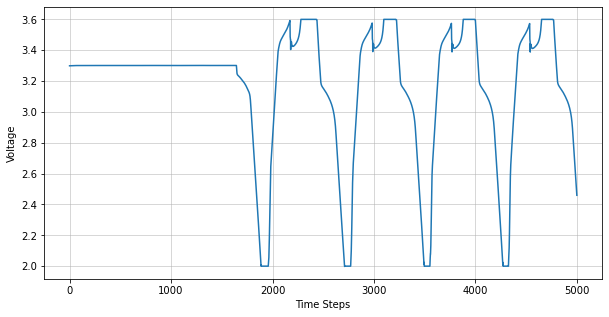

In [16]:
plt.rcParams['figure.figsize'] = (10,5);

sns.lineplot(x = 'Data_Point',y = 'Voltage', data = raw_batt_data[:5000], palette = 'bright');

plt.grid(axis = 'both',linewidth = 0.5);

plt.ylabel('Voltage');

plt.xlabel('Time Steps');







The above voltage graph indicates the voltage pattern during the initial discharge and cyclic process ( only 3 FCE are displayed for better visualization). 

Before the cycling process has actually started, there is an initial discharge (as seen from 0 to 1960) until lower votlage limit is reached. 

For proper analysis and undertanding, we use this as our starting point of our dataset.


# 2. Data Cleaning and Analysis of Predictors: 


In [17]:
# remove Aux Voltage features from the dataset

raw_batt_data = raw_batt_data.drop(['Aux_Voltage'],axis = 1) 


In [18]:

raw_batt_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564263 entries, 0 to 1564262
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Data_Point           1564263 non-null  int64  
 1   Test_Time            1564263 non-null  float64
 2   DateTime             1564263 non-null  float64
 3   Step_Time            1564263 non-null  float64
 4   Step_Index           1564263 non-null  int64  
 5   Cycle_Index          1564263 non-null  int64  
 6   Current              1564263 non-null  float64
 7   Voltage              1564263 non-null  float64
 8   Charge_Capacity      1564263 non-null  float64
 9   Discharge_Capacity   1564263 non-null  float64
 10  Charge_Energy        1564263 non-null  float64
 11  Discharge_Energy     1564263 non-null  float64
 12  dV/dt                1564263 non-null  float64
 13  Internal_Resistance  1562084 non-null  float64
 14  Temperature          1564262 non-null  float64
dty

<AxesSubplot:xlabel='Internal_Resistance', ylabel='Count'>

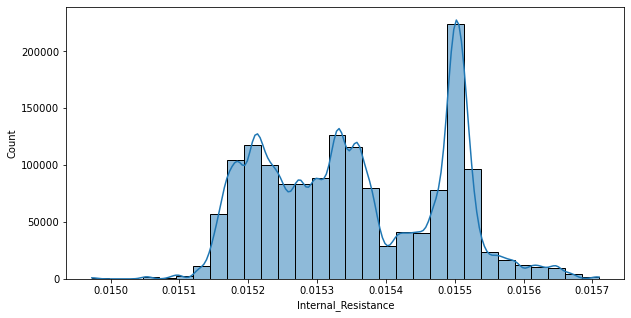

In [19]:
# Look out how the resistance is distributed over the entire test duration 
plt.rcParams['figure.figsize'] = (10,5);

sns.histplot(raw_batt_data['Internal_Resistance'],bins = 30,kde = True)


In [110]:

raw_batt_data['Internal_Resistance'].describe()


count    1.562084e+06
mean     1.535631e-02
std      1.291732e-04
min      1.497273e-02
25%      1.524088e-02
50%      1.534182e-02
75%      1.549029e-02
max      1.570977e-02
Name: Internal_Resistance, dtype: float64

The mean value of Resistance is  0.01535 Ohms and the mode of the data is around 0.0155 Ohms. As there is no much differnce in the values, I have replaced the NaN Values with the mean value of Internal resitance.

In [20]:

# fill na values with mean values

raw_batt_data['Internal_Resistance'].fillna(1.535631e-02,inplace=True)


In [21]:

raw_batt_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564263 entries, 0 to 1564262
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Data_Point           1564263 non-null  int64  
 1   Test_Time            1564263 non-null  float64
 2   DateTime             1564263 non-null  float64
 3   Step_Time            1564263 non-null  float64
 4   Step_Index           1564263 non-null  int64  
 5   Cycle_Index          1564263 non-null  int64  
 6   Current              1564263 non-null  float64
 7   Voltage              1564263 non-null  float64
 8   Charge_Capacity      1564263 non-null  float64
 9   Discharge_Capacity   1564263 non-null  float64
 10  Charge_Energy        1564263 non-null  float64
 11  Discharge_Energy     1564263 non-null  float64
 12  dV/dt                1564263 non-null  float64
 13  Internal_Resistance  1564263 non-null  float64
 14  Temperature          1564262 non-null  float64
dty

In [22]:
#As there is one missing value in the Temperature feature, we are just ignoring it by removing from the dataset.

batt_data = raw_batt_data.dropna(axis = 0,inplace = False)


In [23]:
# No missing values, No NaN values and no object datatypes.

batt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1564262 entries, 1 to 1564262
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Data_Point           1564262 non-null  int64  
 1   Test_Time            1564262 non-null  float64
 2   DateTime             1564262 non-null  float64
 3   Step_Time            1564262 non-null  float64
 4   Step_Index           1564262 non-null  int64  
 5   Cycle_Index          1564262 non-null  int64  
 6   Current              1564262 non-null  float64
 7   Voltage              1564262 non-null  float64
 8   Charge_Capacity      1564262 non-null  float64
 9   Discharge_Capacity   1564262 non-null  float64
 10  Charge_Energy        1564262 non-null  float64
 11  Discharge_Energy     1564262 non-null  float64
 12  dV/dt                1564262 non-null  float64
 13  Internal_Resistance  1564262 non-null  float64
 14  Temperature          1564262 non-null  float64
dty

In [24]:
# remove columns Data_point as it is of no use for our analysis

batt_data = batt_data.drop(['Data_Point'],axis = 1)


In [25]:
# reset the index of the dataset. This helps us in running loops or iterations to plot or clean data in future.
batt_data.reset_index(drop = True,inplace =True)


In [26]:

batt_data.head()


Test_Time      DateTime  Step_Time  Step_Index  Cycle_Index  Current  \
0   120.0110  1.523583e+09   120.0110           0            0      0.0   
1   180.0036  1.523583e+09   180.0036           0            0      0.0   
2   240.0044  1.523583e+09   240.0044           0            0      0.0   
3   300.0033  1.523583e+09   300.0033           0            0      0.0   
4   360.0031  1.523583e+09   360.0031           0            0      0.0   

    Voltage  Charge_Capacity  Discharge_Capacity  Charge_Energy  \
0  3.298994              0.0                 0.0            0.0   
1  3.299010              0.0                 0.0            0.0   
2  3.299028              0.0                 0.0            0.0   
3  3.299037              0.0                 0.0            0.0   
4  3.299054              0.0                 0.0            0.0   

   Discharge_Energy     dV/dt  Internal_Resistance  Temperature  
0               0.0 -0.000011             0.015356    21.950123  
1               0.0  0.000024             0.015356    21.996164  
2               0.0 -0.000014             0.015356    22.138861  
3               0.0 -0.000011             0.015356    22.339970  
4               0.0  0.000038             0.015356    22.506639

In [15]:

#remove the first initial discharge phenomenon to have a uniform dataset. 

# to achieve this, we need to 

steps = []

for i in range(len(batt_data)-1):
    
    if batt_data['Step_Time'][i] > batt_data['Step_Time'][i+1]:
        
        steps.append(i+1)




The initial discharge phenomenon i.e. until the First EoDV shall be removed from the dataset as already explained.



In [27]:

batt_data_act = batt_data[1963:]  

# 1963 is manually observed value. 
# We can ignore this data just by eliminating the step indices 1 to 2 in dataset also.


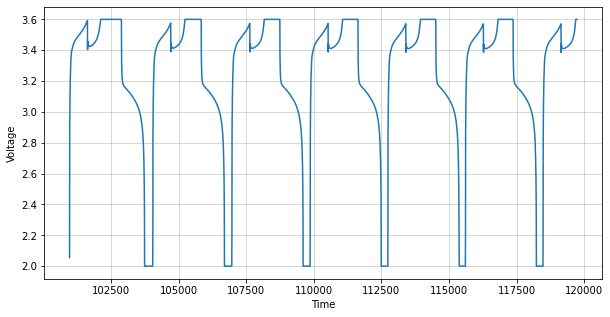

In [30]:
plt.rcParams['figure.figsize'] = (10,5);

sns.lineplot(x = 'Test_Time',y = 'Voltage', data = batt_data_act[:5000], palette = 'bright')

plt.grid(axis = 'both',linewidth = 0.5);

plt.ylabel('Voltage');

plt.xlabel('Time');

At certain time durations, there was no recording of either charging or discharing. This indicates the battery is in rest phase in between every event or measurement error. Technically this has no influence as they are for short duration. These durations are clearly indicated by the corresponding step indices. 

In [31]:


batt_data_01 = batt_data[(batt_data['Step_Index']!= 4) & (batt_data['Step_Index']!= 6) & (batt_data['Step_Index']!= 5)]



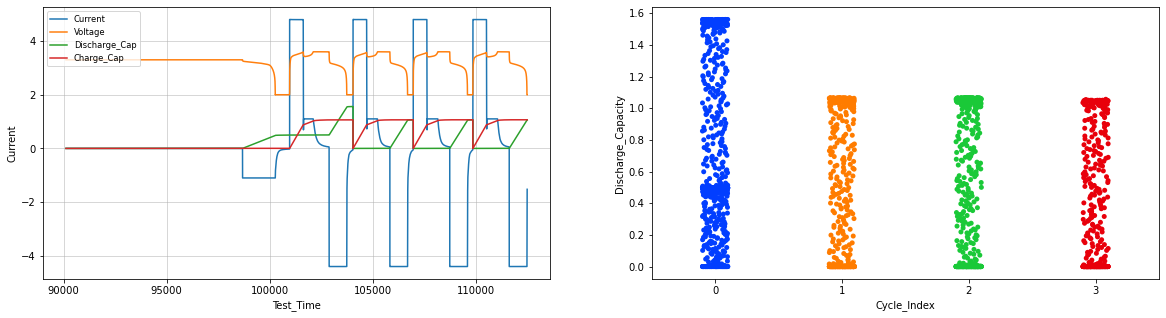

In [53]:
fig, axs = plt.subplots(1,2)
axs = axs.flatten()

plt.rcParams['figure.figsize'] = (20,5);

sns.lineplot(x = 'Test_Time',y = 'Current', data = batt_data_01[1500:5000], palette = 'bright',ax= axs[0])

sns.lineplot(x = 'Test_Time',y = 'Voltage', data = batt_data_01[1500:5000], palette = 'bright',ax= axs[0])

sns.lineplot(x = 'Test_Time',y = 'Discharge_Capacity', data = batt_data_01[1500:5000], palette = 'bright',ax= axs[0])

sns.lineplot(x = 'Test_Time',y = 'Charge_Capacity', data = batt_data_01[1500:5000], palette = 'bright',ax= axs[0])

axs[0].legend(['Current','Voltage','Discharge_Cap','Charge_Cap'],fontsize = 'small',loc = 'upper left')

sns.stripplot(x = 'Cycle_Index',y = 'Discharge_Capacity', data = batt_data_01[1500:5000],palette = 'bright',ax = axs[1],alpha  =1)

axs[0].grid(axis = 'both',linewidth = 0.5)

The discharge capacity measurement during the first cycle is clearly misleading and this is an outlier for us as seen from the above stripplot. So this shall be eliminated as it influences the model performance.  So Cycle 0 is eliminated.

In [49]:

batt_data_02 = batt_data_01[batt_data_01['Cycle_Index']!= 0]


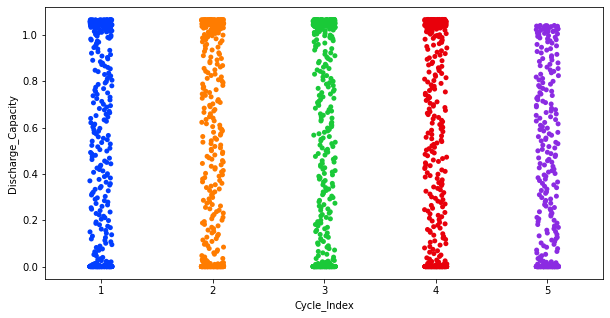

In [61]:

plt.rcParams['figure.figsize'] = (10,5);

sns.stripplot(x = 'Cycle_Index',y = 'Discharge_Capacity', data = batt_data_02[:3700],palette = 'bright',alpha  =1);


In [62]:

batt_data_02.head()


Test_Time      DateTime  Step_Time  Step_Index  Cycle_Index   Current  \
2775  104051.6204  1.523687e+09     0.0822           3            1  0.511612   
2776  104051.6510  1.523687e+09     0.1128           3            1  0.811741   
2777  104051.6872  1.523687e+09     0.1490           3            1  1.099796   
2778  104051.7160  1.523687e+09     0.1778           3            1  1.340481   
2779  104051.7447  1.523687e+09     0.2065           3            1  1.628368   

       Voltage  Charge_Capacity  Discharge_Capacity  Charge_Energy  \
2775  2.098604         0.000000                 0.0        0.00000   
2776  2.122912         0.000000                 0.0        0.00000   
2777  2.153046         0.000024                 0.0        0.00005   
2778  2.181218         0.000024                 0.0        0.00005   
2779  2.218609         0.000024                 0.0        0.00005   

      Discharge_Energy     dV/dt  Internal_Resistance  Temperature  
2775               0.0  0.023378             0.015408    34.833887  
2776               0.0  0.023378             0.015408    34.833965  
2777               0.0  0.023378             0.015408    34.834058  
2778               0.0  0.023378             0.015408    34.834131  
2779               0.0  0.023378             0.015408    34.834204


As we are using multiple predictors and are focussed on the cyclic ageing, the predictors like Datetime is no longer relevant and can be removed from further analysis. Similarly, the energy during charge and discharge also gives same information like capacity and can also be removed. 


In [63]:

batt_data_act = batt_data_02.drop(['DateTime','Charge_Energy','Discharge_Energy'], inplace = False,axis = 1)

batt_data_act.reset_index(drop=True,inplace = True)


In [64]:

batt_data_act.head()


Test_Time  Step_Time  Step_Index  Cycle_Index   Current   Voltage  \
0  104051.6204     0.0822           3            1  0.511612  2.098604   
1  104051.6510     0.1128           3            1  0.811741  2.122912   
2  104051.6872     0.1490           3            1  1.099796  2.153046   
3  104051.7160     0.1778           3            1  1.340481  2.181218   
4  104051.7447     0.2065           3            1  1.628368  2.218609   

   Charge_Capacity  Discharge_Capacity     dV/dt  Internal_Resistance  \
0         0.000000                 0.0  0.023378             0.015408   
1         0.000000                 0.0  0.023378             0.015408   
2         0.000024                 0.0  0.023378             0.015408   
3         0.000024                 0.0  0.023378             0.015408   
4         0.000024                 0.0  0.023378             0.015408   

   Temperature  
0    34.833887  
1    34.833965  
2    34.834058  
3    34.834131  
4    34.834204

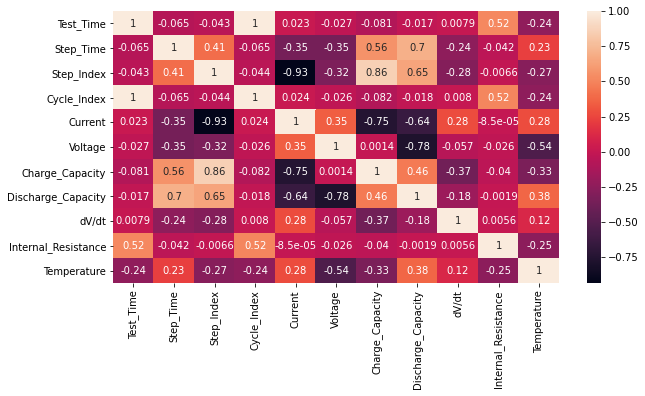

In [68]:
sns.heatmap(batt_data_act.corr(),annot = True);

There is some positive correlation in between the charge capacity and discharge capacity i.e. 0.46 which means if charge capacity is decreaded, then the discharge also decreases.

But technically, the discharge capacity is more influenced by the cycling patterns, ambient temperature, voltage and DoD. These factors also influence the charging.

However, in this model we consider only discharge characteristics for the prediction henceforth though use of charge capacity as an input is interesting thought.

Similarly the time predictors also showed a good correlation w.r.t to discharge capacity but this cant be applicable in the realistic scenarios. So I shall ignore them too.
 
 
Therefore, the relevant step_indices 7,8,10 and 3 are ignored. 

In [69]:

batt_data_act= batt_data_act[(batt_data_act['Step_Index']!= 3) & (batt_data_act['Step_Index']!= 7) & (batt_data_act['Step_Index']!= 10) & (batt_data_act['Step_Index']!= 8)]


In [70]:

batt_data_act.reset_index(drop = True,inplace = True)


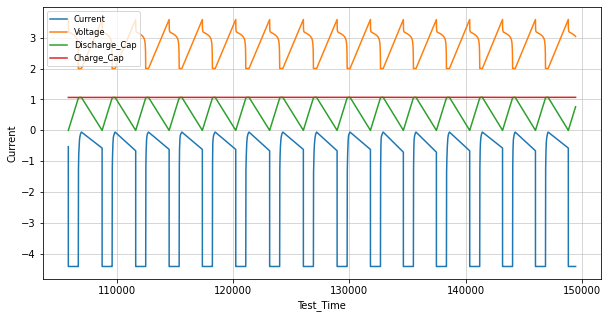

In [74]:

plt.rcParams['figure.figsize'] = (10,5);

sns.lineplot(x = 'Test_Time',y = 'Current', data = batt_data_act[:5000], palette = 'bright')

sns.lineplot(x = 'Test_Time',y = 'Voltage', data = batt_data_act[:5000], palette = 'bright')

sns.lineplot(x = 'Test_Time',y = 'Discharge_Capacity', data = batt_data_act[:5000], palette = 'bright')

sns.lineplot(x = 'Test_Time',y = 'Charge_Capacity', data = batt_data_act[:5000], palette = 'bright')

plt.legend(['Current','Voltage','Discharge_Cap','Charge_Cap'],fontsize = 'small',loc = 'upper left')


plt.grid(axis = 'both',linewidth = 0.5)

In [78]:

batt_data_03 = batt_data_act[['Test_Time','Cycle_Index','Voltage','Current','Discharge_Capacity','dV/dt','Internal_Resistance','Temperature']]


The discharge phase is entirely a CC (Constant Current ) and during the switching, there are some low current value readings for brief seconds. This small current magnitudes for a bare minimum seconds wont influence the discharge capacity much and in this model these values are also ignored. 

In [79]:

# there are certain points which recorded l

batt_data_04 = batt_data_03[batt_data_03['Current'] <= -4]


The maximum discharge varies with every cycle and it shall be extracted from the dataset to understand its trend and behaviour. 

In [82]:
# 
discharged_cap = {}

int_resistance = {}

for i in (batt_data_04['Cycle_Index'].unique()):
    
    discharged_cap[str(i)] = np.round(batt_data_04['Discharge_Capacity'][batt_data_04['Cycle_Index'] == i].max(),3)
    
    int_resistance[str(i)] = np.round(batt_data_04['Internal_Resistance'][batt_data_04['Cycle_Index'] == i].mean(),3)
    

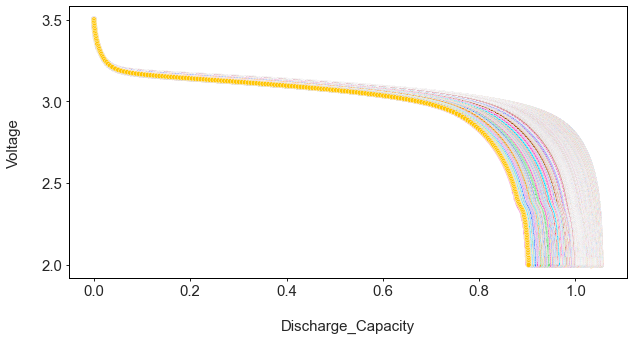

In [95]:
sns.set_style('ticks')

sns.set_context('poster')

with plt.rc_context(dict(sns.axes_style("ticks"),
                         
                         **sns.plotting_context({'font.size': 15.0,
                                                 'axes.labelsize': 15.0,
                                                 'axes.labelpad': 20.0,
                                                 'axes.titlesize': 15.0,
                                                 'xtick.labelsize': 15.0,
                                                 'ytick.labelsize': 15.0,
                                                 'legend.fontsize': 15.0,
                                                 'axes.linewidth': 1.0,
                                                 'grid.linewidth': 0.0001,
                                                 'lines.linewidth': 1,
                                                 'lines.markersize': 5.0,
                                                 'patch.linewidth': 0.0,
                                                 'axes.facecolor': 'white',
                                                 'axes.edgecolor': '0',
                                                 'axes.grid': True,
                                                 'axes.axisbelow': True,
                                                 'axes.labelcolor': '.15',
                                                 'figure.facecolor': 'white',
                                                 'font.family': ['sans-serif'],
                                                 'font.sans-serif': ['Arial'],
                                                 'grid.color': '0.8',
                                                 'grid.linestyle': '--',
                                                 'text.color': '.15',
                                                 'xtick.color': '.15',
                                                 'ytick.color': '.15',
                                                 'xtick.direction': 'out',
                                                 'ytick.direction': 'out',
                                                 'lines.solid_capstyle': 'round',
                                                 'patch.edgecolor': 'w',
                                                 'patch.force_edgecolor': False,
                                                 'xtick.major.width': 1.0,
                                                 'ytick.major.width': 1.0,
                                                 'xtick.minor.width': 1.0,
                                                 'ytick.minor.width': 1.0,
                                                 'xtick.major.size': 3,
                                                 'ytick.major.size': 3.0,
                                                 'xtick.minor.size': 3.0,
                                                 'ytick.minor.size': 3.0 }))):
    
    plt.rcParams['figure.figsize'] = (10,5)  
    
    fig,axs = plt.subplots(1,1)
    
    sns.scatterplot(x = 'Discharge_Capacity',y = 'Voltage',data = batt_data_04,hue = 'Cycle_Index',palette = 'bright',legend = False,ax  =axs)
    

In [84]:

# plotly express library helps to zoom in the datapoints which are closely converged

import plotly

from plotly.express import line,scatter

import plotly.graph_objects as go

from plotly.subplots import make_subplots

# As plotly scatter plots cant be visualized in the repository, adding addition plots with seaborn for reference 

In [85]:
#Discharge Capacity characteristics

scatter(batt_data_04[batt_data_04['Cycle_Index']%100 == 0],x = 'Discharge_Capacity',y = 'Voltage',color = 'Cycle_Index')


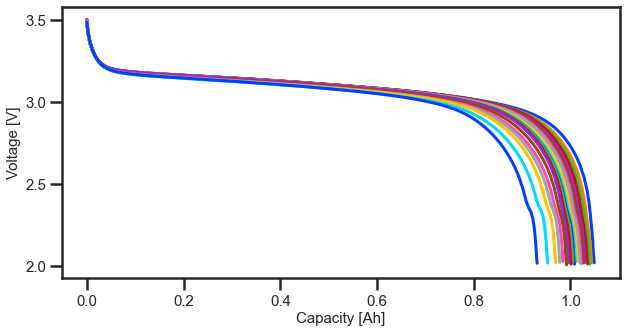

In [97]:
plt.rcParams['figure.figsize'] = (10,5) ;

sns.lineplot(x = 'Discharge_Capacity',y = 'Voltage',data = batt_data_04[batt_data_04['Cycle_Index']%100 == 0],hue = 'Cycle_Index',palette = 'bright',legend = False);
plt.xlabel('Capacity [Ah]',fontsize = 15);
plt.ylabel('Voltage [V]',fontsize = 15);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

The above plot shows that discharge capacity vs voltage over the entire cyclic duration. The maximum discharge capacity has been reduced with increase in no of full cycles. It can also be seen that the end of discharge voltage in the later stages of cycling reaches quicker compared to new cells. The voltage gradient after 60% DoD is more divergent which resembles the influence of ageing on the batteries.

In [98]:
#dv/dt characteristics

scatter(batt_data_04[batt_data_04['Cycle_Index']%100 == 0],x = 'Discharge_Capacity',y = 'dV/dt',color = 'Cycle_Index')


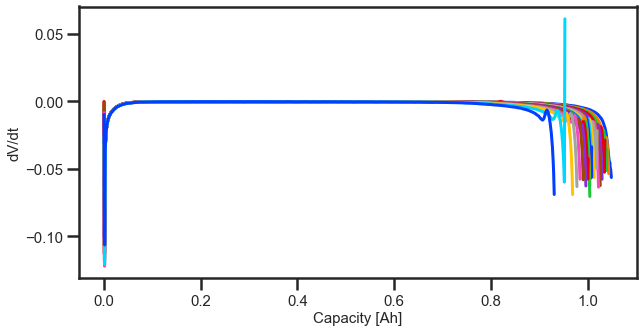

In [101]:
plt.rcParams['figure.figsize'] = (10,5) ;

sns.lineplot(x = 'Discharge_Capacity',y = 'dV/dt',data = batt_data_04[batt_data_04['Cycle_Index']%100 == 0],hue = 'Cycle_Index',palette = 'bright',legend = False);
plt.xlabel('Capacity [Ah]',fontsize = 15);
plt.ylabel('dV/dt',fontsize = 15);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

Similar to votlage curves, dV/dt i.e the voltage gradient has also shown similar behaviour. Larger gradients at the end of discharge voltages and a uniform pattern during the initial phases. We can build better models when we also have the capacity gradient i.e. dQ/dt to estimate the loss of capacity through ICA or DVA analysis. However, some additional methodology with smoothing function needs to be implemented. So in this case, this methodology is not considered. 

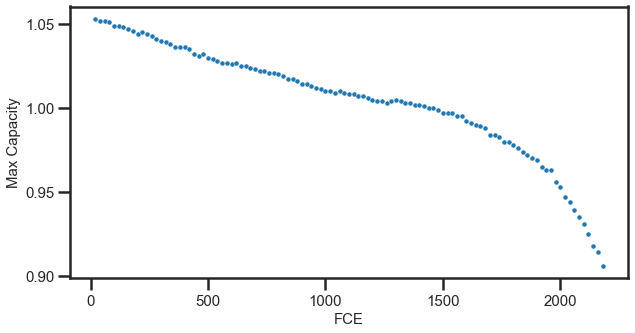

In [111]:
plt.rcParams['figure.figsize'] = (10,5) ;

FCE = np.arange(1,2190,1)  # no of full cycles
df = pd.concat((pd.DataFrame(FCE),pd.DataFrame(discharged_cap.values())),axis = 1)
df.columns = ['FCE','Max. Capacity']


sns.scatterplot(y = 'Max. Capacity',x = 'FCE',data = df[df['FCE']%20 == 0],palette = 'bright',s = 25);
plt.xlabel('FCE',fontsize = 15);
plt.ylabel('Max Capacity',fontsize = 15);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);


From the above curve showing the max discharged capacity w.r.t Full Cycles, it can be inferred that the capacity degradation is consistent with every cycle and by using only these two datasets i.e FCE as predictor and Capacity as Target variable, we can build a polynomial regression model which gives the trend in the future time steps.

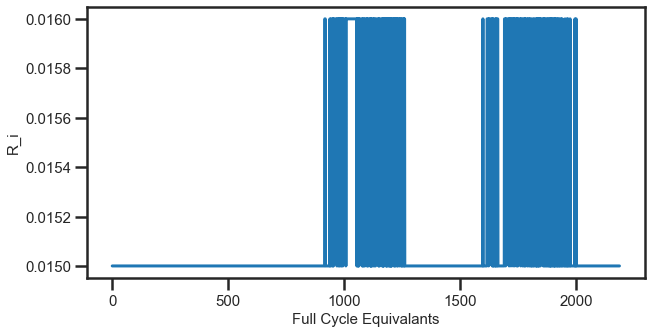

In [114]:
plt.rcParams['figure.figsize'] = (10,5) ;
plt.plot(int_resistance.values())
plt.ylabel('R_i',fontsize = 15)
plt.xlabel('Full Cycle Equivalants',fontsize = 15);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

Technically the internal resistance increase resembles the power fade which is also one of the indicators for aged cells. This measurement is made at uniform conditions i.e at same soc, temperature and crate. Then only it can be used as a reference. In this scenario, i am not sure how the resistance is measured and the recordings are inconsistent over the cyclic duration. Hence, resistance as parameter is ignored hereafter in this challenge.

# Polynomial Regression (1D) :  

Sample try


In [115]:
# Polynomial Regression Basic Model

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

x = FCE

y = np.array(list(discharged_cap.values()))


In [116]:
# Training the model

poly_model = np.poly1d(np.polyfit(x,y,5))


R-Square of the polynomial fit: 0.9989578530203499


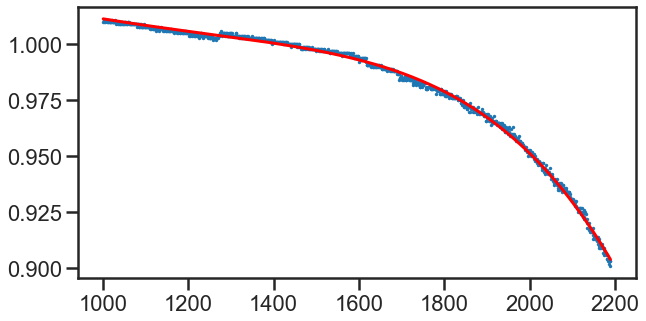

In [117]:

plt.scatter(x[1000:],y[1000:],s = 2);

plt.plot(x[1000:],poly_model(x[1000:]),'r');

print('R-Square of the polynomial fit:',r2_score(y,poly_model(x)))


In [118]:

#generate a dummy test data with FCE from 2190 to 2300

test_data = np.arange(2190,2300,1)


In [119]:
pred_test = poly_model(test_data)

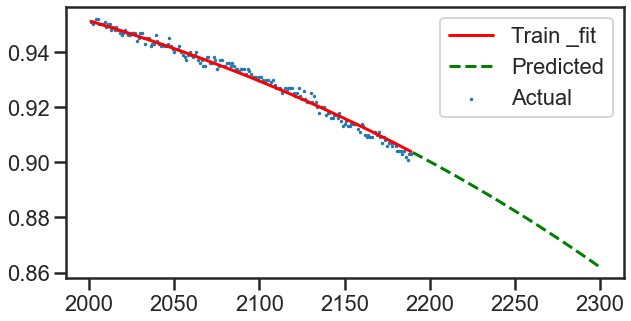

In [121]:

plt.scatter(x[2000:],y[2000:],s = 2);

plt.plot(x[2000:],poly_model(x[2000:]),'r');

plt.plot(test_data,pred_test,'--g');

plt.legend(['Train _fit','Predicted','Actual']);


With polynomial regression with 5th degree fit, we can fit the capacity discharge vs cycles and can find the trend in which the deradation may happen over the cycles. But at different operating conditions, this trend might diverge from the predicted path due to the influence of external factors. So we prefer a multi variate regression or prediction with deep neural networks given the enormous size of data and accuracy requirements.



# 3. Model with Deep Neural Networks (DNN): 


Neural networks are datadriven based and unlike the model based prediction algorithms, these are unperturbed by the cell internal parameters. DNNs have history of accurately match the relationships among the predictors to the target variables. 
In this case, at first i begin with a feed forward NN to estimate the real time discharged capacity i.e. State of Charge (SoC).

Prior to the modelling, the correlation between predictors shall be observed to understand and process the data better.Pandas correlation function together with a heatmap could give better results.


<AxesSubplot:>

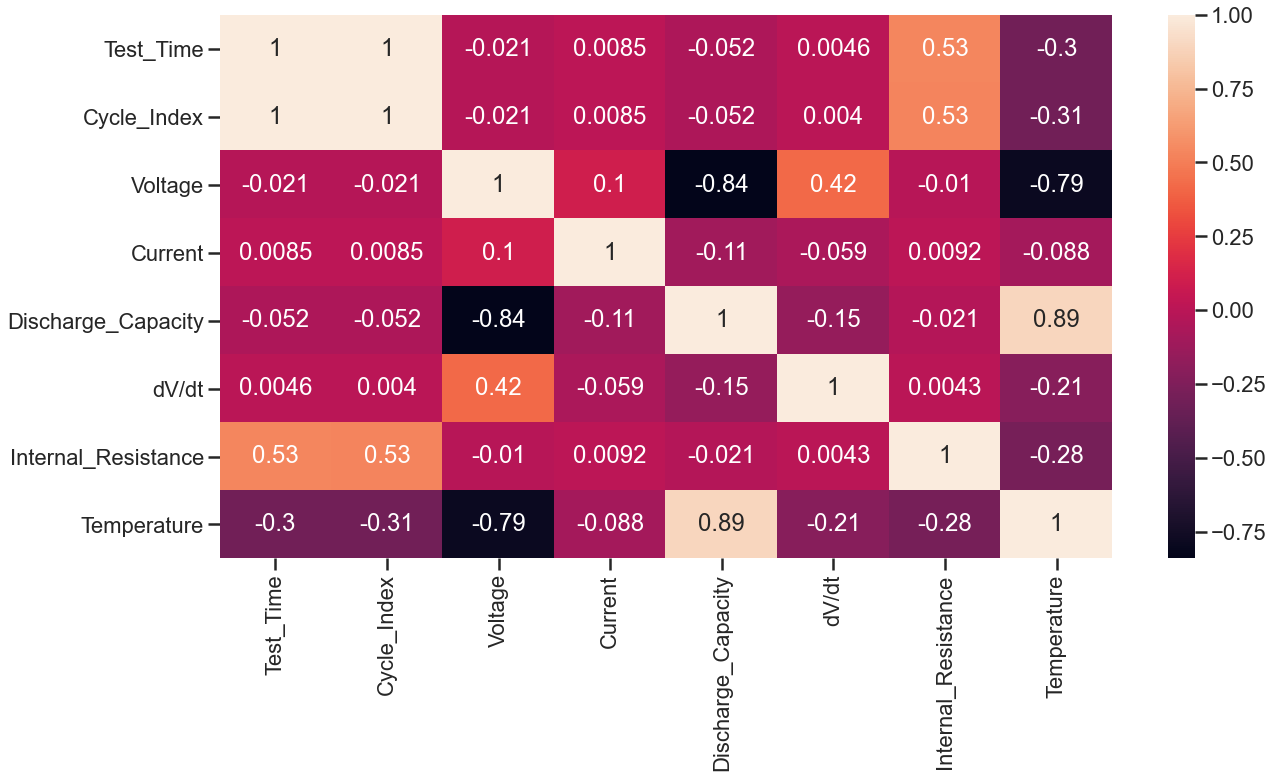

In [124]:

#check correlation of the data 

plt.rcParams['figure.figsize'] = (20,10);

sns.heatmap(batt_data_04.corr(),annot = True)


In our model, we consider the target as the discharge capacity and we observe the influence or correlation of every predictor with this variable. Postive values denote positive correlations and viceversa. Voltage & temperature are strongly correlated with discharge capacity and so is current and dV/dt. So we start with these variables as input to predict the Discharge capacity.

In [125]:

batt_data_05 = batt_data_04[['Voltage','Temperature','Current','dV/dt','Discharge_Capacity']]


In [127]:

batt_data_05.describe()


Voltage    Temperature        Current          dV/dt  \
count  568420.000000  568420.000000  568420.000000  568420.000000   
mean        2.888229      34.701693      -4.398928      -0.010461   
std         0.386884       1.787689       0.016582       0.018775   
min         1.993858      29.901241      -4.402965      -0.127359   
25%         2.621170      33.274882      -4.400190      -0.012722   
50%         3.057206      34.688845      -4.400070      -0.001261   
75%         3.146566      36.229725      -4.399944      -0.000296   
max         3.506285      38.206706      -4.003974       0.081761   

       Discharge_Capacity  
count       568420.000000  
mean             0.593646  
std              0.362547  
min              0.000000  
25%              0.258143  
50%              0.655209  
75%              0.953253  
max              1.053603

As every predictor is distributed across various mean values, the data is normalized between 0 to 1 to have a uniform distribution by scaling the data. This step of scaling the data gives a better training performance and mapping. 

In [128]:
# Target Variable

Cap_dis = batt_data_05.pop('Discharge_Capacity')


In [129]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.metrics import mean_squared_error,r2_score

In [130]:
# split the data into train, validation and test modes

x_train,x_test,y_train,y_test = train_test_split(batt_data_05,Cap_dis,shuffle = True,test_size = 0.3)

x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,shuffle = True,test_size = 0.5)


In [131]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_val_scaled = scaler.fit_transform(x_val)

x_test_scaled = scaler.fit_transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))

y_val_scaled = scaler.fit_transform(y_val.values.reshape(-1,1))

y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1,1))


The datasets are preprocessed, normalized and converted to a suitable format that a neural network can accept and process. In the next step, the model is built and train dataset is fed into it for learning.  
The validation and test datasets are used to validate the model performance with the data that is different from traindataset. 

Keras platform of Tensorflow is used to build the model.

In [132]:
from keras.models import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,ZeroPadding2D,add,BatchNormalization,Activation,AveragePooling2D,Dropout
from keras.layers import LSTM,Bidirectional
from keras.datasets import mnist
from keras.utils import to_categorical,plot_model
from keras.optimizers import SGD,Adam

from keras.models import load_model,Model
from keras.backend import placeholder
from keras.initializers import glorot_uniform
#from keras.utils import multi_gpu_model
from keras.metrics import RootMeanSquaredError
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [133]:
# reviewing the shapes of the train and test datasets to design the architecture of the model.

print('The shape of train dataset is:',x_train.shape)

print('The shape of validation dataset is:',x_val.shape)

print('The shape of test dataset is:',x_test.shape)

The shape of train dataset is: (397894, 4)
The shape of validation dataset is: (85263, 4)
The shape of test dataset is: (85263, 4)


In [98]:
def DNN(X):
    np.random.seed(1)   # to generate a same set of random weights during every run.
    
    model = Sequential()

    model.add(Dense(4,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros',input_dim=X.shape[1]))

    model.add(Dense(256,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))

    model.add(Dense(128,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))

    model.add(Dense(64,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))

    model.add(Dense(10,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))
    
    model.add(Dense(1,activation='relu',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))
    
    
    model.summary()

    model.compile(loss='mse', optimizer=Adam(lr=0.00001))  #Adam optimizer gives the best model performance.

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)
    
    history = model.fit(x_train_scaled,y_train_scaled,batch_size = 32, epochs = 20,validation_data = (x_val_scaled,y_val_scaled),verbose = 1,shuffle = False,callbacks=[es])
    
    plt.plot(history.history['loss'],label ='train')
    
    plt.plot(history.history['val_loss'],label = 'val loss')
    
    
    return model

In [99]:
model = DNN(x_train_scaled)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 43,113
Trainable params: 43,113
Non-trainable params: 0
____________________________________________________

The model architecture is designed as shown above. The input layer has 4 nodes which are the four predictors in our train dataset. Then, it is followed by 4 hidden layers and then by the output layer with 1 output node. Different activation functions were used in this model such as tan and relu. As we are dealing with series of values > 0, i preferred relu function and for the remaining all i used tanh. 

hyper parameter tuning:

Bias = 0

Optimizer = Adam (gives best performance than Gradient descent or SGD)

Learningrate : 0.00001 (started with high learning rates and resulted in variance (overfitting) and diverging of loss.So tuned until 0.00001 besides the no of nodes in hidden layers).

early stopping active when the loss is stabilized or diverging.

epochs : 20


Epoch 1/20
12435/12435 [==============================] - 18s 1ms/step - loss: 0.0113 - val_loss: 0.0033
Epoch 2/20
12435/12435 [==============================] - 17s 1ms/step - loss: 0.0011 - val_loss: 4.1602e-04
Epoch 3/20
12435/12435 [==============================] - 19s 2ms/step - loss: 3.9510e-04 - val_loss: 3.8754e-04
Epoch 4/20
12435/12435 [==============================] - 19s 2ms/step - loss: 3.7736e-04 - val_loss: 3.7728e-04
Epoch 5/20
12435/12435 [==============================] - 19s 2ms/step - loss: 3.6858e-04 - val_loss: 3.7088e-04
Epoch 6/20
12435/12435 [==============================] - 21s 2ms/step - loss: 3.6269e-04 - val_loss: 3.6603e-04
Epoch 7/20
12435/12435 [==============================] - 19s 2ms/step - loss: 3.5847e-04 - val_loss: 3.6211e-04
Epoch 8/20
12435/12435 [==============================] - 23s 2ms/step - loss: 3.5504e-04 - val_loss: 3.5895e-04
Epoch 9/20
12435/12435 [==============================] - 18s 1ms/step - loss: 3.5230e-04 - val_loss: 3.5589

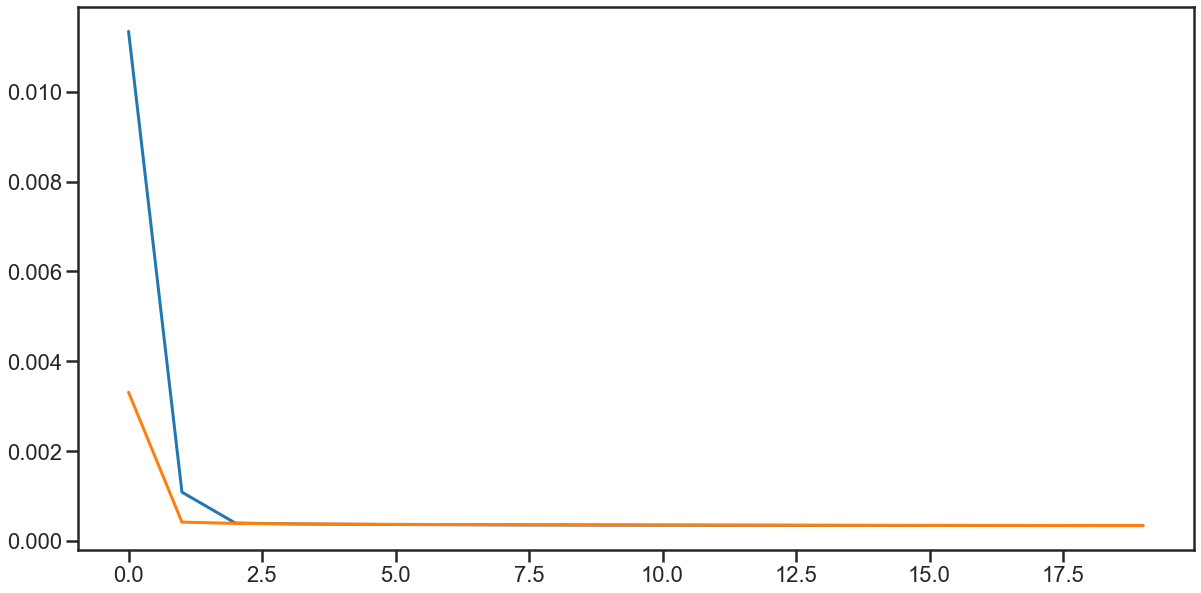

In [64]:
model = DNN(x_train_scaled)

model.save_weights('model.h5')

In [65]:
predictions_train = model.predict(x_train_scaled)

R2 = r2_score(y_train_scaled,predictions_train)

print('R-square value for training:',R2)

predictions_val = model.predict(x_val_scaled)

R2 = r2_score(y_val_scaled,predictions_val)

print('R-square value for validation:', R2)

predictions_test = model.predict(x_test_scaled)

R2 = r2_score(y_test_scaled,predictions_test)

print('R-square value for test:', R2)

pred_train = scaler.inverse_transform(predictions_train)

y_act_train = scaler.inverse_transform(y_train_scaled)

pred_val = scaler.inverse_transform(predictions_val)

y_act_val = scaler.inverse_transform(y_val_scaled)

pred_test = scaler.inverse_transform(predictions_test)

y_act_test = scaler.inverse_transform(y_test_scaled)



R-square value for training: 0.9971345066661795
R-square value for validation: 0.9971269373721203
R-square value for test: 0.9840747087450435


In [66]:

pred_data = pd.concat((pd.DataFrame(pred_train),pd.DataFrame(pred_val),pd.DataFrame(pred_test),pd.DataFrame(y_act_train),pd.DataFrame(y_act_val),pd.DataFrame(y_act_test)),axis = 1)

pred_data.columns = ['pred_train','pred_validation','pred_test','act_train','act_validation','act_test']


In [67]:

scatter(pred_data[:1000],x = 'pred_train',y='act_train')


In [68]:

scatter(pred_data[:300],x = 'pred_validation',y='act_validation')


<AxesSubplot:ylabel='Count'>

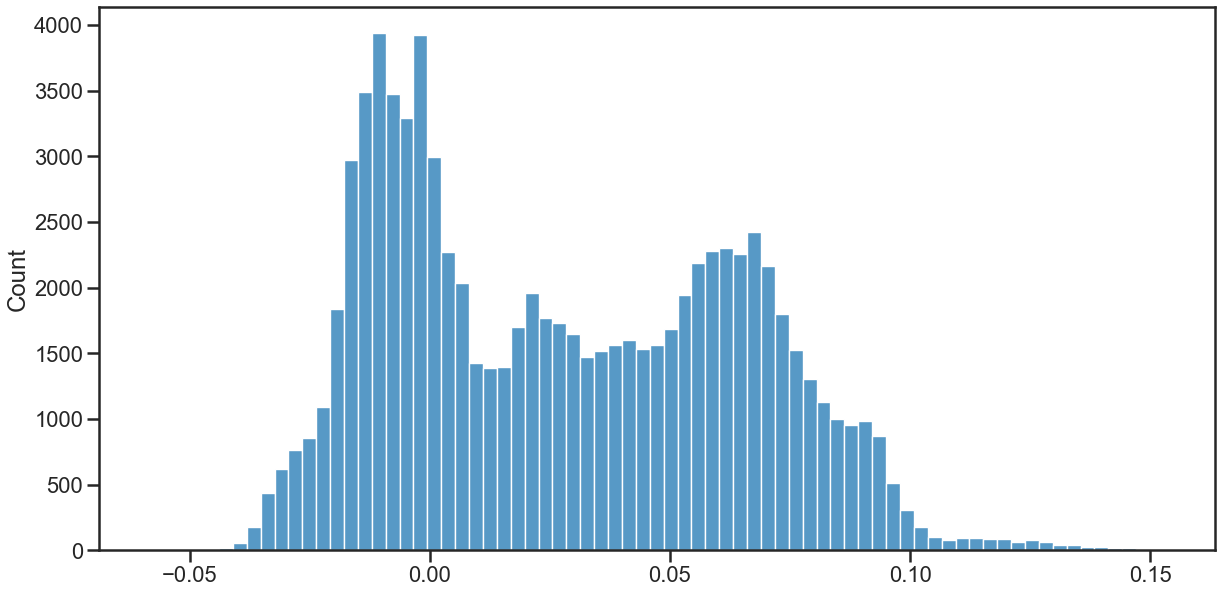

In [69]:

sns.histplot(pred_data['pred_test']-pred_data['act_test'])


Conclusions Drawn: 

From the above distribution plot, it can be seen the max error in prediction is around 0.10 Ah and most of the data points have less than 0.05 AH difference. From the R2 values, we can deduce that the model is trained very well and no signs of overfit or underfitting. if there is an overfit, then the validation losses would haven't converged and r2 values would be much lesser than trained performance. 

# 4. Approach to estimate the Max. Allowed Discharge:

In the previous case, we have estimated the possible amount of capacity discharged in that particular cycle given the measurements of voltage, current, temperatures etc. Now, the maximum discharge i.e. SoH shall be estimated by same set of data.
A model is built by using the cyclic count as an additional predictor to determine the maximum allowed discharge capacity during that particular event. In this case, we use an additional target variable instead of max discharge directly i.e. State of Health (SoH).

In [70]:
batt_data_06 = batt_data_04.copy()

batt_data_06.drop(['Internal_Resistance'],axis = 1,inplace = True)

batt_data_06['max_Capacity'] = 'nan'

batt_data_06.reset_index(inplace = True,drop = True)

In [71]:
#voltage - capacity characteristics

scatter(batt_data_06[batt_data_06['Cycle_Index']%50 == 0],x = 'Discharge_Capacity',y = 'Voltage',color = 'Cycle_Index')


In [72]:
# temperature - capacity characteristics

scatter(batt_data_06[batt_data_06['Cycle_Index']%50 == 0],x = 'Discharge_Capacity',y = 'Temperature',color = 'Cycle_Index')


As explained before, battery voltage over the entire duration of cycling has shown significant influence of the capacity. The voltage gradient increases with cycling and due to this the End of discharge voltage is quickly reached. However, the variation in the voltage is more effective in the later part of discharge event i.e. after discharging 0.6 AH of capacity. So in this model we ignore the data below 0.6 Ah and train the model with the remaining data. 

Unlike previous case, the temperature has no meaningful influence on the State of health as the tests were performed at a same ambient temperature. There is no clear indication of either temperature or temperature gradient inlfuencing the ageing. So we ignore this term in this model.

In [73]:

batt_data_06 = batt_data_06[batt_data_06['Discharge_Capacity'] > 0.6]


In [74]:

batt_data_06.head()


Cycle_Index   Voltage   Current  Discharge_Capacity     dV/dt  \
120            1  3.079469 -4.400157            0.602789 -0.000313   
121            1  3.077933 -4.400232            0.608896 -0.000329   
122            1  3.076429 -4.400150            0.615050 -0.000295   
123            1  3.074897 -4.400300            0.621129 -0.000375   
124            1  3.073324 -4.400211            0.627288 -0.000333   

     Temperature max_Capacity  
120    34.635388          nan  
121    34.686478          nan  
122    34.738502          nan  
123    34.738503          nan  
124    34.743603          nan

In [75]:
import warnings
warnings.filterwarnings("ignore")

for i in (batt_data_06['Cycle_Index'].unique()):
    
    batt_data_06['max_Capacity'][batt_data_06['Cycle_Index'] == i] = discharged_cap[str(i)]
    

In [76]:

batt_data_06['SoH'] = batt_data_06['max_Capacity']/batt_data_06['max_Capacity'].max()


In [77]:
batt_data_06['SoH'] = batt_data_06['SoH'].astype('float64')

batt_data_06['max_Capacity'] = batt_data_06['max_Capacity'].astype('float64')


In [78]:

batt_data_06.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 303955 entries, 120 to 568419
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Cycle_Index         303955 non-null  int64  
 1   Voltage             303955 non-null  float64
 2   Current             303955 non-null  float64
 3   Discharge_Capacity  303955 non-null  float64
 4   dV/dt               303955 non-null  float64
 5   Temperature         303955 non-null  float64
 6   max_Capacity        303955 non-null  float64
 7   SoH                 303955 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 20.9 MB


<AxesSubplot:>

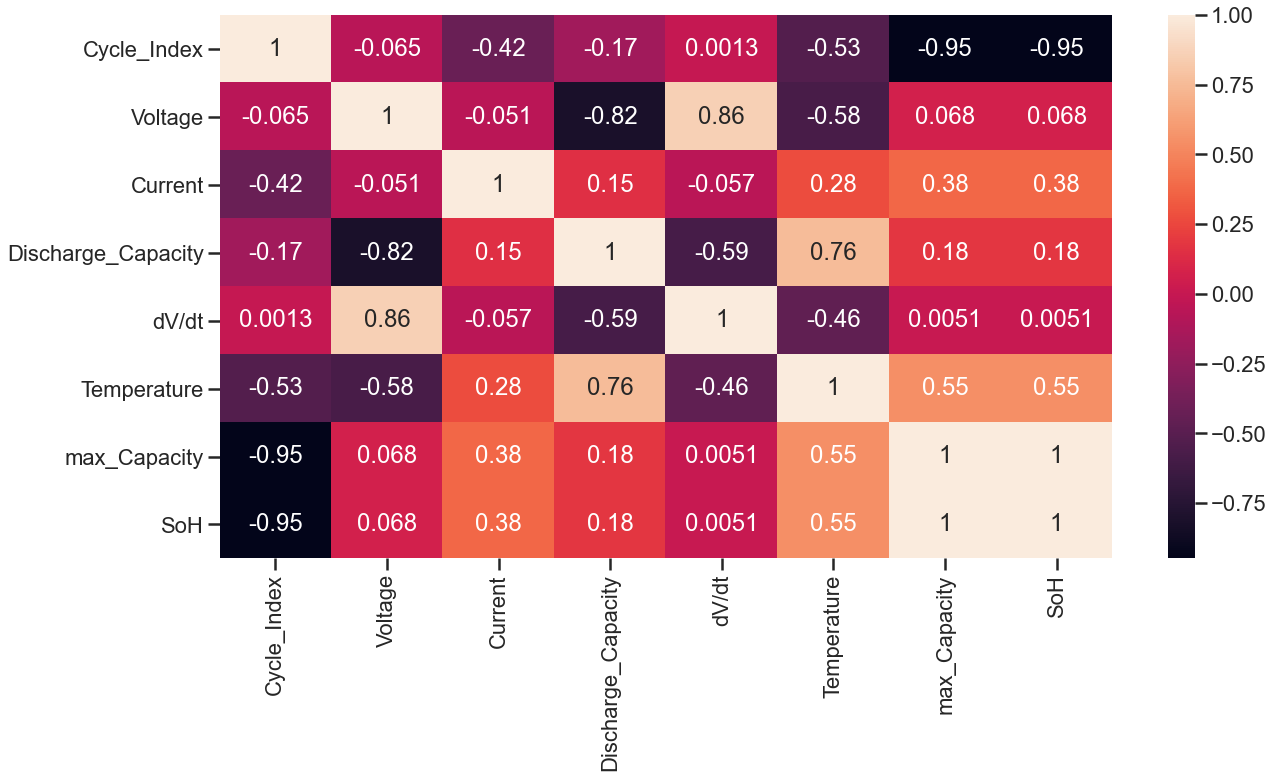

In [79]:

sns.heatmap(batt_data_06.corr(),annot = True)


In [80]:

batt_data_07 = batt_data_06[['Cycle_Index','Voltage','Discharge_Capacity','SoH']]


In [81]:

y_data = batt_data_07.pop('SoH')

x_data = batt_data_07


In [82]:

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,shuffle = True,test_size = 0.3)

x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,shuffle = True,test_size = 0.5)


In [83]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_val_scaled = scaler.fit_transform(x_val)

x_test_scaled = scaler.fit_transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))

y_val_scaled = scaler.fit_transform(y_val.values.reshape(-1,1))

y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1,1))


In [84]:

x_train_scaled.shape


(212768, 3)

In [85]:
def DNN_2(X):
    
    np.random.seed(1)   # to generate a same set of random weights during every run.
    
    model1 = Sequential()

    model1.add(Dense(3,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros',input_dim=X.shape[1]))

    model1.add(Dense(512,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))

    model1.add(Dense(128,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))

    model1.add(Dense(64,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))

    model1.add(Dense(10,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))
    
    model1.add(Dense(1,activation='relu',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))
    
    model1.compile(loss='mse', optimizer=Adam(lr=0.000001))  #Adam optimizer gives the best model performance.

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)
    
    history = model1.fit(x_train_scaled,y_train_scaled,batch_size = 32, epochs = 20,validation_data = (x_val_scaled,y_val_scaled),verbose = 1,shuffle = False,callbacks=[es])
    
    plt.plot(history.history['loss'],label ='train')
    
    plt.plot(history.history['val_loss'],label = 'val loss')
    
    
    return model1

Except for the number of input nodes, the remaining part of hyperparameter tuning and modelling is same as explained before.

Epoch 1/20
6649/6649 [==============================] - 11s 2ms/step - loss: 0.0669 - val_loss: 0.0192
Epoch 2/20
6649/6649 [==============================] - 11s 2ms/step - loss: 0.0152 - val_loss: 0.0118
Epoch 3/20
6649/6649 [==============================] - 13s 2ms/step - loss: 0.0088 - val_loss: 0.0065
Epoch 4/20
6649/6649 [==============================] - 12s 2ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 5/20
6649/6649 [==============================] - 12s 2ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 6/20
6649/6649 [==============================] - 11s 2ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 7/20
6649/6649 [==============================] - 14s 2ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 8/20
6649/6649 [==============================] - 15s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 9/20
6649/6649 [==============================] - 14s 2ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 10/20
6649/6649 [==============================] - 13s 2ms/step - l

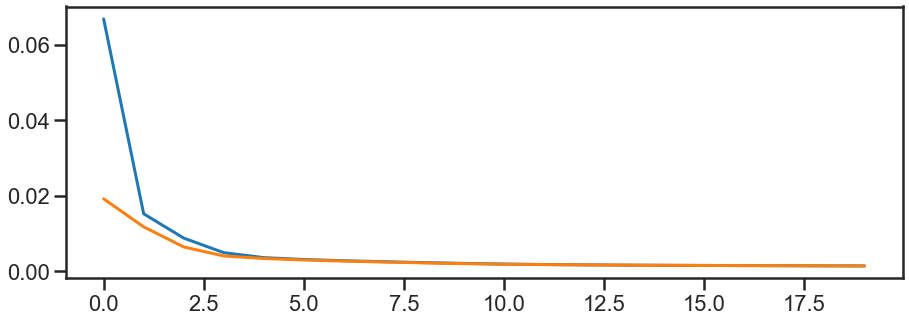

In [91]:
model1 = DNN_2(x_train_scaled)

model1.save_weights('model1.h5')

In [92]:
predictions_train = model1.predict(x_train_scaled);

R2 = r2_score(y_train_scaled,predictions_train)

print('R-square value for training:',R2)

predictions_val = model1.predict(x_val_scaled);

R2 = r2_score(y_val_scaled,predictions_val)

print('R-square value for validation:', R2)

predictions_test = model1.predict(x_test_scaled);

R2 = r2_score(y_test_scaled,predictions_test)

print('R-square value for test:', R2)

pred_train = scaler.inverse_transform(predictions_train)

y_act_train = scaler.inverse_transform(y_train_scaled)

pred_val = scaler.inverse_transform(predictions_val)

y_act_val = scaler.inverse_transform(y_val_scaled)

pred_test = scaler.inverse_transform(predictions_test)

y_act_test = scaler.inverse_transform(y_test_scaled)


R-square value for training: 0.9682572325879031
R-square value for validation: 0.9681151317203258
R-square value for test: 0.9684115375947514


In [93]:
pred_data = pd.concat((pd.DataFrame(pred_train),pd.DataFrame(pred_val),pd.DataFrame(pred_test),pd.DataFrame(y_act_train),pd.DataFrame(y_act_val),pd.DataFrame(y_act_test)),axis = 1)

pred_data.columns = ['pred_train','pred_validation','pred_test','act_train','act_validation','act_test']


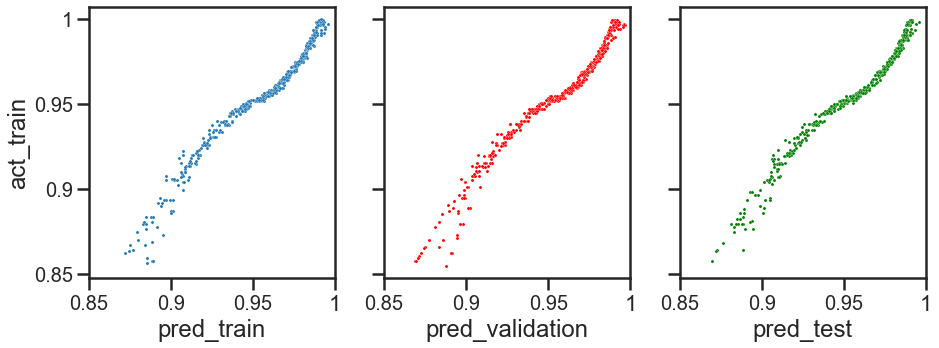

In [94]:
plt.rcParams['figure.figsize'] = (15,5)

fig,axs = plt.subplots(ncols = 3,nrows  =1, sharey = True)

axs = axs.flatten()

sns.scatterplot(x = 'pred_train',y = 'act_train',data = pred_data[0:500],ax = axs[0],s = 10)

sns.scatterplot(x = 'pred_validation',y = 'act_validation',data = pred_data[0:500],ax = axs[1],s=10,color = 'r')

sns.scatterplot(x = 'pred_test',y = 'act_test',data = pred_data[0:500],ax = axs[2],s =10,color = 'g')

axs[0].set_xlim(0.85,1)

axs[0].set_xticklabels([0.85,0.9,0.95,1],fontsize = 20)

axs[0].set_yticklabels([0.85,0.9,0.95,1],fontsize = 20)

axs[0].set_yticks([0.85,0.9,0.95,1])

axs[0].set_xticks([0.85,0.9,0.95,1])

axs[1].set_xlim(0.85,1)

axs[1].set_xticklabels([0.85,0.9,0.95,1],fontsize = 20)

axs[1].set_yticklabels([0.85,0.9,0.95,1],fontsize = 20)

axs[1].set_yticks([0.85,0.9,0.95,1])

axs[1].set_xticks([0.85,0.9,0.95,1])

axs[2].set_xlim(0.85,1)

axs[2].set_xticklabels([0.85,0.9,0.95,1],fontsize = 20)

axs[2].set_yticklabels([0.85,0.9,0.95,1],fontsize = 20)

axs[2].set_yticks([0.85,0.9,0.95,1])

axs[2].set_xticks([0.85,0.9,0.95,1])


Text(0.5, 0, 'Test')

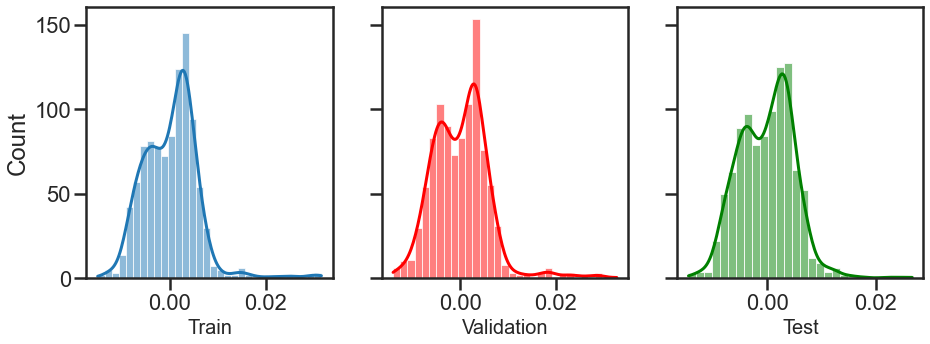

In [97]:
plt.rcParams['figure.figsize'] = (15,5)

fig,axs = plt.subplots(ncols = 3,nrows  =1, sharey = True)

axs = axs.flatten()

sns.histplot(pred_data['pred_train'][0:1000]-pred_data['act_train'][0:1000],ax = axs[0],kde = True)

sns.histplot(pred_data['pred_validation'][0:1000]-pred_data['act_validation'][0:1000],ax = axs[1],color = 'r',kde = True)

sns.histplot(pred_data['pred_test'][0:1000]-pred_data['act_test'][0:1000],ax = axs[2],color = 'g',kde = True)

axs[0].set_xlabel('Train',fontsize = 20)

axs[1].set_xlabel('Validation',fontsize = 20)

axs[2].set_xlabel('Test',fontsize = 20)


The above model shows no bias or variance in the dataset as the R-2 value is smae and mse remains under accepted values for all datasets. The above distplots explains the variance of the prediction errors which are les than 2%.

# LSTM based Approach:

CNN and LSTM is the widely used technique now in the state of charge and state of health estimations. State of charge follows a pattern which is similst to time series forecasting and it gives excellent model performance with LSTM networks. On the otherside, SoH is a tricky phenomenon. In EV the discharge curves wont be the same everytime and its pretty hard to define the boundary conditions. But charging profiles remain the same over the lifetime. These charging profiles are converted into the datasets suitable to CNNs such as image datasets and the model is trained. Here, one entire charge profile is considered as one input.

In this approach, I modelled with LSTM network, whereas with CNN we need some additional time to data augmentation and training needs a cloud platform or a gpu. So i confined myself to LSTM.


In [106]:

batt_data_08 = batt_data_06[['Cycle_Index','Voltage','Discharge_Capacity','Temperature','SoH']]


In [107]:
#LSTM features 

n_i = 1 #previous time steps to predict the next step

n_f = len(batt_data_08.columns)-1  # no of predictors

n_o = 1 # prediction timesteps

In [108]:
# inorder to build a lstm model, the data shall be made some changes as per the LSTM format.

def data_to_LSTM_format(df,n_i,n_f,n_o):
    
    n_vars = df.shape[1]

    cols, names = list(),list()

    for i in range(n_i,0,-1):

        cols.append(df.shift(i))

        names += [('var%d(t-%d)') %((j+1,i)) for j in range(n_vars)]

    
    for i in range(n_o):
        cols.append(df.shift(i))

    for j in range(n_vars):

        for i in range(0,n_o):

            if i== 0:
                names+=[('var%d(t)') %(j+1)]

            else:
                names +=[('var%d(t+%d)')%((j+1,i))]

    df_LSTM = pd.concat(cols,axis=1)
    
    df_LSTM.columns = names

    df_LSTM.dropna(inplace = True)
    
    return names,df_LSTM



In [111]:

names,data_LSTM = data_to_LSTM_format(batt_data_08,n_i,n_f,n_o)


In [112]:

data_LSTM.head()


var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var1(t)   var2(t)  \
121        1.0   3.079469   0.602789  34.635388   0.995256        1  3.077933   
122        1.0   3.077933   0.608896  34.686478   0.995256        1  3.076429   
123        1.0   3.076429   0.615050  34.738502   0.995256        1  3.074897   
124        1.0   3.074897   0.621129  34.738503   0.995256        1  3.073324   
125        1.0   3.073324   0.627288  34.743603   0.995256        1  3.071741   

      var3(t)    var4(t)   var5(t)  
121  0.608896  34.686478  0.995256  
122  0.615050  34.738502  0.995256  
123  0.621129  34.738503  0.995256  
124  0.627288  34.743603  0.995256  
125  0.633391  34.747166  0.995256

In [114]:
#convert it into 3d format. 

data_x = data_LSTM[data_LSTM.columns[:n_i*n_f+n_o-1]]

data_y = data_LSTM[data_LSTM.columns[-n_o:]]


In [115]:
#split the datasets 

x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,shuffle= False,test_size=0.3)

x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,shuffle=False,test_size = 0.5)


In [116]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit_transform(x_test)

x_val_scaled = scaler.fit_transform(x_val)

y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1,1))

y_test_scaled = scaler.fit_transform(np.array(y_test).reshape(-1,1))

y_val_scaled = scaler.fit_transform(np.array(y_val).reshape(-1,1))

In [118]:
x_train_LSTM = x_train_scaled.reshape(x_train.shape[0],n_i,n_f)

x_test_LSTM = x_test_scaled.reshape(x_test.shape[0],n_i,n_f)

x_val_LSTM = x_val_scaled.reshape(x_val.shape[0],n_i,n_f)

y_train_LSTM = y_train_scaled

y_test_LSTM = y_test_scaled

y_val_LSTM = y_val_scaled

In [119]:

print('The shape of an input for LSTM is:',x_train_LSTM.shape)


The shape of an input for LSTM is: (212767, 1, 4)


In [122]:
def LSTM_model(X):
    
    np.random.seed(1)

    X_i = Input(shape = (X.shape[1],X.shape[2]))
    
    X = Bidirectional(LSTM(256,activation = 'tanh',kernel_initializer = 'glorot_uniform',return_sequences=True,input_shape=(X.shape[1:])))(X_i)
    

    X = Bidirectional(LSTM(128,activation = 'tanh',kernel_initializer = 'glorot_uniform',return_sequences =True))(X)

    X = (LSTM(128,activation = 'tanh',kernel_initializer = 'glorot_uniform',return_sequences =True))(X)

    
    X = Dropout(0.2)(X)
    
    X = Dense(50,activation='tanh',name='layer3')(X)
    
    X = Dense(10,activation='tanh',name='layer4')(X)
    
    X = Dense(1,activation= 'relu',name='layer5')(X)

    model_LSTM = Model(inputs = X_i,outputs = X)
    
    return model_LSTM

In the LSTM model, besides bidirectional lstms, a dropout layer is also used to avoid exploding or vanishing gradients. In every iteration, it skips some nodes to keep gradients under acceptable levels. This is followed by dense layers to estimate the output.

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 4)]            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1, 512)            534528    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1, 256)            656384    
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 128)            197120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 128)            0         
_________________________________________________________________
layer3 (Dense)               (None, 1, 50)             6450      
_________________________________________________________________
layer4 (Dense)               (None, 1, 10)            

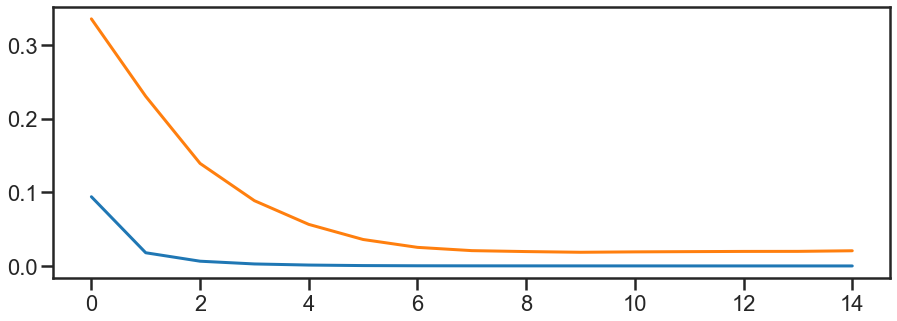

In [124]:
model_LSTM = LSTM_model(x_train_LSTM)

model_LSTM.summary()

np.random.seed(1)

model_LSTM.compile(optimizer = Adam(lr=0.00001),loss = 'mse')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)

history = model_LSTM.fit(x_train_LSTM,y_train_LSTM,batch_size = 64, epochs = 20,validation_data = (x_val_LSTM,y_val_LSTM),verbose = 1,shuffle = False,callbacks=[es])

plt.plot(history.history['loss'],label ='train')

plt.plot(history.history['val_loss'],label = 'val loss')

model_LSTM.save_weights('LSTM.h5')

In [126]:
predictions_train = model_LSTM.predict(x_train_LSTM)

R2 = r2_score(y_train_LSTM,predictions_train.reshape(-1,1))

print('The R-square value for train dataset:',R2)


predictions_val = model_LSTM.predict(x_val_LSTM);

R2 = r2_score(y_val_LSTM,predictions_val.reshape(-1,1))

print('The R-square value for validation dataset:',R2)

predictions_test = model_LSTM.predict(x_test_LSTM);

R2 = r2_score(y_test_LSTM,predictions_test.reshape(-1,1))

print('The R-square value for test dataset:',R2)

The R-square value for train dataset: 0.9882041922746457
The R-square value for validation dataset: 0.77430976066407
The R-square value for test dataset: 0.47075055418136214


In [127]:
pred_train = scaler.inverse_transform(predictions_train.reshape(-1,1))

y_act_train = scaler.inverse_transform(y_train_LSTM)

pred_val = scaler.inverse_transform(predictions_val.reshape(-1,1))

y_act_val = scaler.inverse_transform(y_val_LSTM)

pred_test = scaler.inverse_transform(predictions_test.reshape(-1,1))

y_act_test = scaler.inverse_transform(y_test_LSTM)

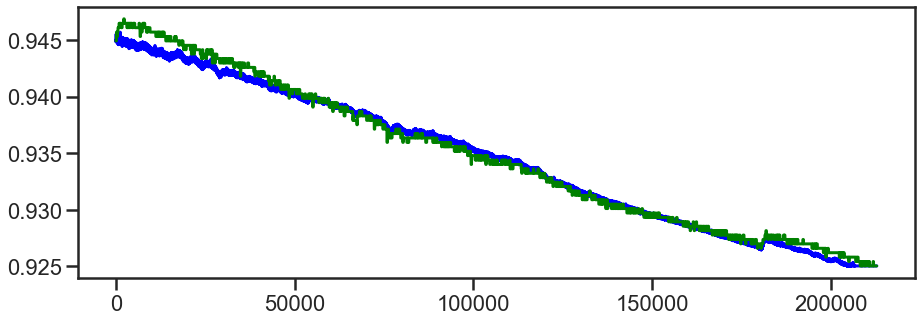

In [128]:
plt.plot(pred_train,'-b')

plt.plot(y_act_train,'-g')

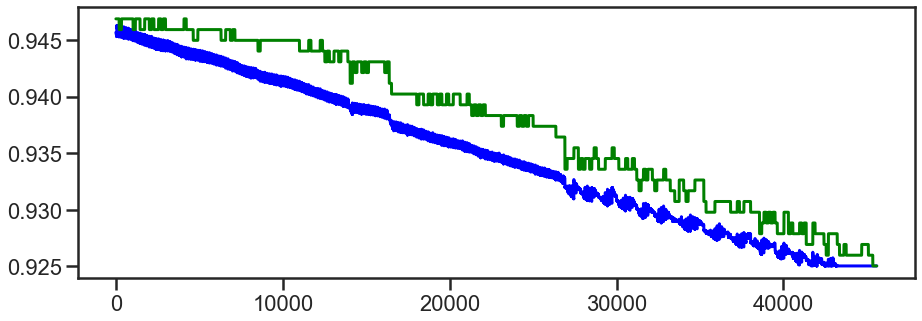

In [129]:
plt.plot(pred_val,'-b')

plt.plot(y_act_val,'-g')

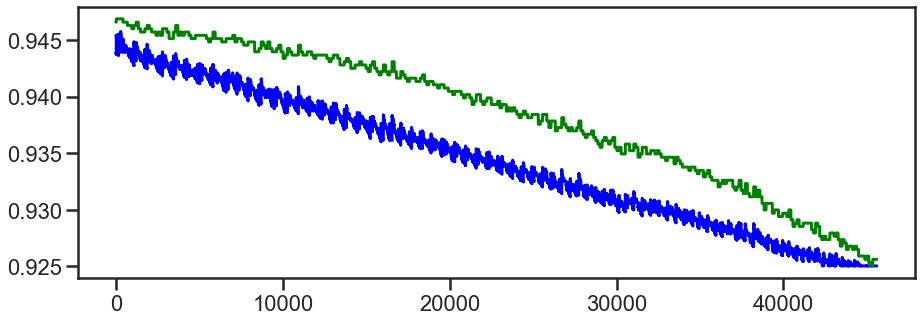

In [130]:
plt.plot(pred_test,'-b')

plt.plot(y_act_test,'-g')

This model has high variance as we can see the dataset is clearly overfitting (train loss << val loss) . To avoid this, we need to increase the dataset size or further tune the learning rates or architecture. The training process consumes lot of time and as you said , the results are secondary, i left it open. 



# Conclusion:

From the above three DNN models, it can be inferred that the model performance is very good with no signs of variance and bias in the first two feed forward networks. The losses have converged as expected and can still be tried with different set of variables. 

In the case of LSTM, theoretically and by the already placed research, it gives best performance. However, due to the non availability of suitable GPUs and also the not a result oriented approach had made me stop with one training. The LSTM model is clearly overfitting and the validation losses and errors in prediction are high. This can be further tuned by adding more drop out layers or reducing the training data or tuning the learning rate.


These models can be improved further with generating new set of data such as dQ/dt, charge profiles for CNN etc. As far as this challenge is concerned, i just want to know that I can write machine learning,DNN programs understand their performance and most importantly the technicalities and boundary conditions of the battery systems to design the models.



